In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
import csv
final_data = pd.read_csv("FinalData.csv") 
len(final_data)

/home/stellasylee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (24,25,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4613411

In [3]:
final_data = final_data[final_data.YEAR2.notnull()]

In [5]:
final_data['LOCATION_IN_OUT_CODE'] = final_data['LOCATION_IN_OUT_CODE'].astype('category')
final_data['YEAR2'] = final_data['YEAR2'].astype('category')
final_data['SUSPECT_SEX'] = final_data['SUSPECT_SEX'].astype('category')
final_data['SUSPECT_BODY_BUILD_TYPE'] = final_data['SUSPECT_BODY_BUILD_TYPE'].astype('category')

In [6]:
list(final_data)

['Unnamed: 0',
 'LOCATION_IN_OUT_CODE',
 'OBSERVED_DURATION_MINUTES',
 'STOP_DURATION_MINUTES',
 'HOUR',
 'MIN',
 'YEAR2',
 'SUSPECT_ARRESTED_FLAG',
 'SUMMONS_ISSUED_FLAG',
 'FRISKED_FLAG',
 'SEARCHED_FLAG',
 'OTHER_CONTRABAND_FLAG',
 'CIRCUMSTANCES_WEAPON',
 'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
 'BACKGROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
 'SUSPECT_RACE_DESCRIPTION',
 'SUSPECT_REPORTED_AGE',
 'CIRCUMSTANCES_SURVEILLANCE',
 'SUSPECT_HEIGHT',
 'SUSPECT_SEX',
 'SUSPECT_BODY_BUILD_TYPE',
 'STOP_LOCATION_PRECINCT',
 'STOP_LOCATION_X',
 'STOP_LOCATION_Y',
 'CRIME_DESCRIPTION_SPECIFIC',
 'CRIME_DESCRIPTION_GENERAL',
 'KNIFE_CUTTER_FLAG',
 'OTHER_WEAPON_FLAG',
 'FIREARM_FLAG',
 'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG',
 'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
 'PHYSICAL_FORCE_OTHER_FLAG',
 'WEAPON',
 'STOP_LOCATION_BOROUGH',
 'PERC_BLACK_BOR']

In [18]:
by_year_stopped = final_data.groupby(['YEAR']).size().reset_index(name='counts')
by_year_stopped

,YEAR,counts
0,2005.0,398189
1,2006.0,506457
2,2007.0,472080
3,2008.0,540301
4,2009.0,581168
5,2010.0,601285
6,2011.0,685724
7,2012.0,532911
8,2013.0,191851
9,2014.0,45787


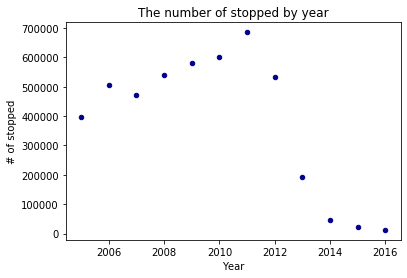

In [24]:
p_stopped = by_year_stopped.plot.scatter(x='YEAR', y='counts',c='DarkBlue', title='The number of stopped by year')
p_stopped.set(xlabel="Year", ylabel="# of stopped")
p_stopped.get_figure().savefig('plot_stopped.jpg')

In [11]:
stopped_by_race = final_data.groupby(['SUSPECT_RACE_DESCRIPTION']).size().reset_index(name='counts')
stopped_by_race

,SUSPECT_RACE_DESCRIPTION,YEAR2,counts
0,American Indian,2005.0,1620
1,American Indian,2006.0,1863
2,American Indian,2007.0,1762
3,American Indian,2008.0,2031
4,American Indian,2009.0,2271
...,...,...,...
93,White Hispanic,2014.0,9700
94,White Hispanic,2015.0,5090
95,White Hispanic,2016.0,2753
96,White Hispanic,2017.0,2570


In [21]:
frisked_data = final_data[final_data['FRISKED_FLAG']==1]
by_year_frisked = frisked_data.groupby(['YEAR']).size().reset_index(name='counts')
by_year_frisked

,YEAR,counts
0,2005.0,167893
1,2006.0,217162
2,2007.0,245023
3,2008.0,293838
4,2009.0,329925
5,2010.0,337406
6,2011.0,381704
7,2012.0,297244
8,2013.0,111639
9,2014.0,30345


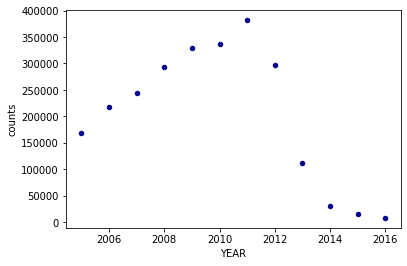

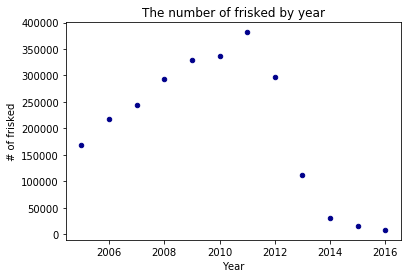

In [25]:
p_frisked = by_year_frisked.plot.scatter(x='YEAR', y='counts',c='DarkBlue', title='The number of frisked by year')
p_frisked.set(xlabel="Year", ylabel="# of frisked")
p_frisked.get_figure().savefig('plot_frisked.jpg')

In [56]:
full_colnames = ['LOCATION_IN_OUT_CODE', 'YEAR', 'SUMMONS_ISSUED_FLAG', 'OTHER_CONTRABAND_FLAG', 'CIRCUMSTANCES_WEAPON',
                 'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG','CIRCUMSTANCES_SURVEILLANCE','SUSPECT_HEIGHT', 'WEAPON',  'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG','PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
                 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG', 'PHYSICAL_FORCE_OTHER_FLAG','PERC_BLACK_BOR', 'SUSPECT_SEX', 'SUSPECT_BODY_BUILD_TYPE', 'FRISKED_FLAG']
filtered = final_data[full_colnames].dropna(axis=0) 

In [52]:
sex = pd.get_dummies(filtered['SUSPECT_SEX'],drop_first=True)
build = pd.get_dummies(filtered['SUSPECT_BODY_BUILD_TYPE'],drop_first=True)

In [53]:
X = pd.concat([filtered[full_colnames[:len(full_colnames)-2]],sex,build],axis=1) 
X.head()

,LOCATION_IN_OUT_CODE,YEAR,SUMMONS_ISSUED_FLAG,OTHER_CONTRABAND_FLAG,CIRCUMSTANCES_WEAPON,SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG,CIRCUMSTANCES_SURVEILLANCE,SUSPECT_HEIGHT,WEAPON,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG,PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG,PHYSICAL_FORCE_OTHER_FLAG,PERC_BLACK_BOR,M,Z,MEDIUM,THIN,Unknown
0,1.0,2005.0,0.0,0.0,0,0.0,1.0,75.0,0.0,0.0,0.0,0,0.0,11.5,1.0,0.0,1.0,0.0,0.0
1,0.0,2005.0,0.0,0.0,0,0.0,0.0,70.0,0.0,0.0,0.0,0,0.0,11.5,1.0,0.0,1.0,0.0,0.0
2,0.0,2005.0,0.0,0.0,0,0.0,0.0,65.0,0.0,0.0,0.0,0,0.0,11.5,1.0,0.0,0.0,1.0,0.0
3,0.0,2005.0,0.0,0.0,0,0.0,0.0,72.0,0.0,0.0,0.0,0,0.0,11.5,1.0,0.0,0.0,1.0,0.0
4,0.0,2005.0,0.0,0.0,0,0.0,1.0,60.0,0.0,0.0,0.0,0,0.0,11.5,0.0,0.0,0.0,1.0,0.0


In [57]:
X = pd.concat([filtered[full_colnames[:len(full_colnames)-3]],sex,build],axis=1) 
y = filtered['FRISKED_FLAG']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/home/stellasylee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[164070 154729]
 [ 88395 331717]]


Text(0.5, 257.44, 'Predicted label')

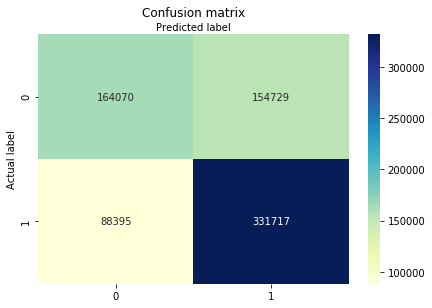

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sn.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6709698461655057
Precision: 0.6819194730761482
Recall: 0.7895918231328789


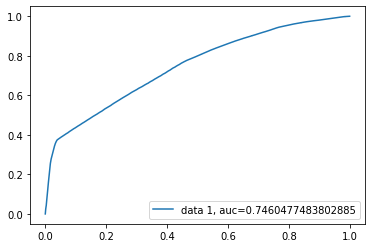

In [64]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [8]:
frisked_full = pd.read_csv("friskedmodel.csv") 

In [ ]:
l

In [70]:
list(frisked_full)

['Unnamed: 0',
 'FRISKED_FLAG',
 'LOCATION_IN_OUT_CODE',
 'OTHER_CONTRABAND_FLAG',
 'CIRCUMSTANCES_WEAPON',
 'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
 'CIRCUMSTANCES_SURVEILLANCE',
 'SUSPECT_SEX',
 'WEAPON',
 'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
 'PHYSICAL_FORCE_OTHER_FLAG',
 'PERC_BLACK_BOR',
 'predicted',
 'res_pearson']

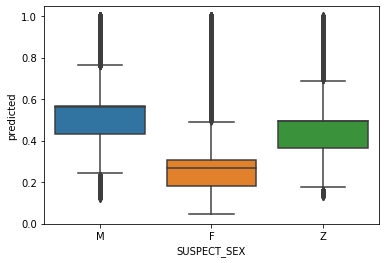

In [74]:
sn.boxplot(data=frisked_full, x='SUSPECT_SEX', y='predicted')

In [7]:
model_results = pd.read_csv("finalstretch.csv") 

/home/stellasylee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (25,26,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
bf2013result = model_results[model_results.AFTER2013==0]
bf2013result.head()
af2013result = model_results[model_results.AFTER2013==1]
af2013result.head()

,Unnamed: 0,X,LOCATION_IN_OUT_CODE,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,HOUR,MIN,YEAR2,SUSPECT_ARRESTED_FLAG,SUMMONS_ISSUED_FLAG,...,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG,PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG,PHYSICAL_FORCE_OTHER_FLAG,WEAPON,STOP_LOCATION_BOROUGH,PERC_BLACK_BOR,AFTER2013,predicted,predicted_with_year
4318168,4318169,4318169,1.0,6.0,1.0,4.0,52.0,2013,0,0.0,...,0.0,0.0,0,0.0,0.0,Manhattan,NaN,1,NaN,NaN
4318169,4318170,4318170,1.0,15.0,3.0,3.0,15.0,2013,0,0.0,...,0.0,0.0,0,0.0,0.0,Manhattan,NaN,1,NaN,NaN
4318170,4318171,4318171,1.0,10.0,5.0,3.0,0.0,2013,0,0.0,...,0.0,0.0,0,1.0,0.0,Manhattan,NaN,1,NaN,NaN
4318171,4318172,4318172,0.0,1.0,1.0,12.0,12.0,2013,0,0.0,...,0.0,0.0,0,0.0,0.0,Manhattan,NaN,1,NaN,NaN
4318172,4318173,4318173,0.0,5.0,2.0,23.0,0.0,2013,0,0.0,...,0.0,0.0,0,0.0,0.0,Manhattan,NaN,1,NaN,NaN


In [8]:
list(model_results)

['Unnamed: 0',
 'X',
 'LOCATION_IN_OUT_CODE',
 'OBSERVED_DURATION_MINUTES',
 'STOP_DURATION_MINUTES',
 'HOUR',
 'MIN',
 'YEAR2',
 'SUSPECT_ARRESTED_FLAG',
 'SUMMONS_ISSUED_FLAG',
 'FRISKED_FLAG',
 'SEARCHED_FLAG',
 'OTHER_CONTRABAND_FLAG',
 'CIRCUMSTANCES_WEAPON',
 'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
 'BACKGROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
 'SUSPECT_RACE_DESCRIPTION',
 'SUSPECT_REPORTED_AGE',
 'CIRCUMSTANCES_SURVEILLANCE',
 'SUSPECT_HEIGHT',
 'SUSPECT_SEX',
 'SUSPECT_BODY_BUILD_TYPE',
 'STOP_LOCATION_PRECINCT',
 'STOP_LOCATION_X',
 'STOP_LOCATION_Y',
 'CRIME_DESCRIPTION_SPECIFIC',
 'CRIME_DESCRIPTION_GENERAL',
 'KNIFE_CUTTER_FLAG',
 'OTHER_WEAPON_FLAG',
 'FIREARM_FLAG',
 'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG',
 'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
 'PHYSICAL_FORCE_OTHER_FLAG',
 'WEAPON',
 'STOP_LOCATION_BOROUGH',
 'PERC_BLACK_BOR',
 'AFTER2013',
 'predicted',
 'predicted_with_year']

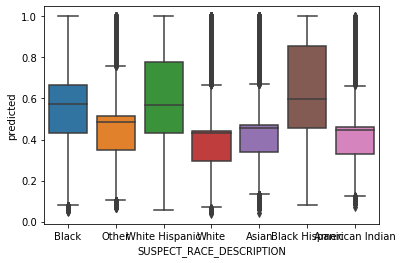

In [9]:
sn.boxplot(data=model_results, x='SUSPECT_RACE_DESCRIPTION', y='predicted')

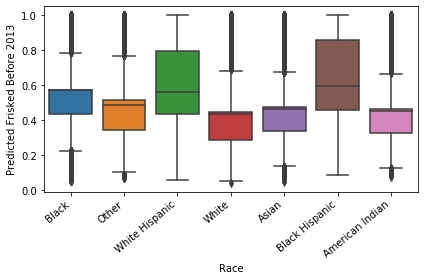

In [22]:
race = sn.boxplot(data=bf2013result, x='SUSPECT_RACE_DESCRIPTION', y='predicted_with_year')

race.set_xticklabels(race.get_xticklabels(), rotation=40, ha="right")
race.set(xlabel='Race', ylabel='Predicted Frisked Before 2013')
plt.tight_layout()
plt.show()

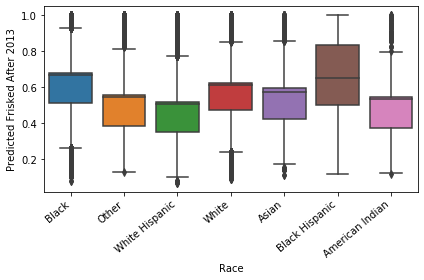

In [23]:
raceaf = sn.boxplot(data=af2013result, x='SUSPECT_RACE_DESCRIPTION', y='predicted_with_year')

raceaf.set_xticklabels(race.get_xticklabels(), rotation=40, ha="right")
raceaf.set(xlabel='Race', ylabel='Predicted Frisked After 2013')
plt.tight_layout()
plt.show()

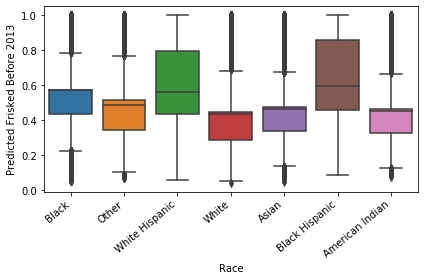

In [24]:
racewoyr = sn.boxplot(data=bf2013result, x='SUSPECT_RACE_DESCRIPTION', y='predicted')

racewoyr.set_xticklabels(race.get_xticklabels(), rotation=40, ha="right")
racewoyr.set(xlabel='Race', ylabel='Predicted Frisked Before 2013')
plt.tight_layout()
plt.show()

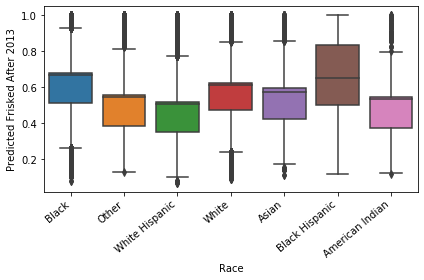

In [25]:
racewoyraf = sn.boxplot(data=af2013result, x='SUSPECT_RACE_DESCRIPTION', y='predicted')

racewoyraf.set_xticklabels(race.get_xticklabels(), rotation=40, ha="right")
racewoyraf.set(xlabel='Race', ylabel='Predicted Frisked After 2013')
plt.tight_layout()
plt.show()

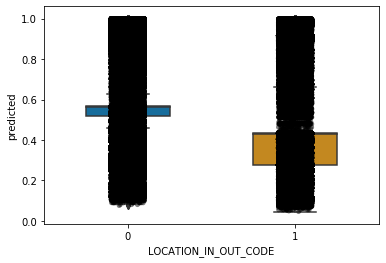

In [78]:
# make boxplot with Seaborn
bplot=sn.boxplot(y='predicted', x='LOCATION_IN_OUT_CODE', 
                 data=frisked_full, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sn.stripplot(y='predicted', x='LOCATION_IN_OUT_CODE', 
                   data=frisked_full, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')